In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [14]:
data = pd.read_csv('Assets/nutrition.csv')
data.head()

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...


In [15]:
print('Jumlah data:', data.shape)

Jumlah data: (1346, 7)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1346 non-null   int64  
 1   calories      1346 non-null   float64
 2   proteins      1346 non-null   float64
 3   fat           1346 non-null   float64
 4   carbohydrate  1346 non-null   float64
 5   name          1346 non-null   object 
 6   image         1346 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 73.7+ KB


In [17]:
data.describe()

,id,calories,proteins,fat,carbohydrate
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,673.500000,203.217385,10.001189,7.584027,25.390193
std,388.701042,163.075430,11.847980,13.733063,32.193054
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,337.250000,75.000000,1.800000,0.500000,4.525000
50%,673.500000,146.000000,5.000000,2.000000,13.300000
75%,1009.750000,333.750000,15.000000,8.275000,37.575000
max,1346.000000,940.000000,83.000000,100.000000,647.000000


In [18]:
print('Jumlah value yang missed:', data.isnull().sum)

Jumlah value yang missed: <bound method DataFrame.sum of          id  calories  proteins    fat  carbohydrate   name  image
0     False     False     False  False         False  False  False
1     False     False     False  False         False  False  False
2     False     False     False  False         False  False  False
3     False     False     False  False         False  False  False
4     False     False     False  False         False  False  False
...     ...       ...       ...    ...           ...    ...    ...
1341  False     False     False  False         False  False  False
1342  False     False     False  False         False  False  False
1343  False     False     False  False         False  False  False
1344  False     False     False  False         False  False  False
1345  False     False     False  False         False  False  False

[1346 rows x 7 columns]>


In [35]:
data[data["proteins"] < 10]

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...
5,6,85.0,0.9,6.5,7.7,Alpukat segar,https://katakabar.com/assets/images/upload/new...
...,...,...,...,...,...,...,...
1341,1342,42.0,1.2,0.6,9.3,Wortel Segar,https://www.astronauts.id/blog/wp-content/uplo...
1342,1343,37.0,1.0,0.6,8.3,Wortel kukus,https://www.wikihow.com/images_en/thumb/b/bf/S...
1343,1344,28.0,0.7,0.5,6.3,Wortel rebus,https://asset-a.grid.id/crop/0x222:594x690/700...
1344,1345,254.0,3.0,1.1,58.1,Yangko,https://serikatnews.com/wp-content/uploads/202...


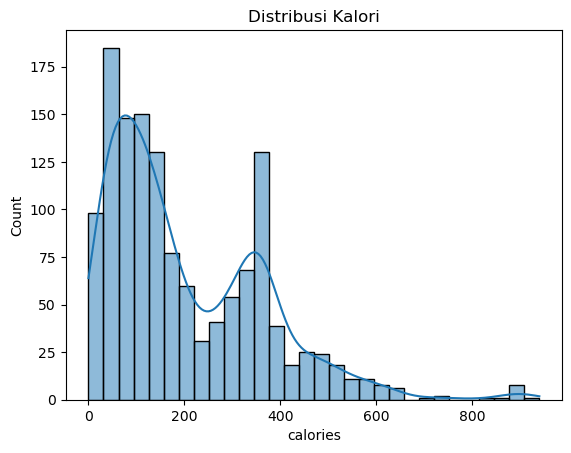

In [25]:
plt.Figure()
sns.histplot(data['calories'], bins=30, kde=True)
plt.title("Distribusi Kalori")
plt.show()

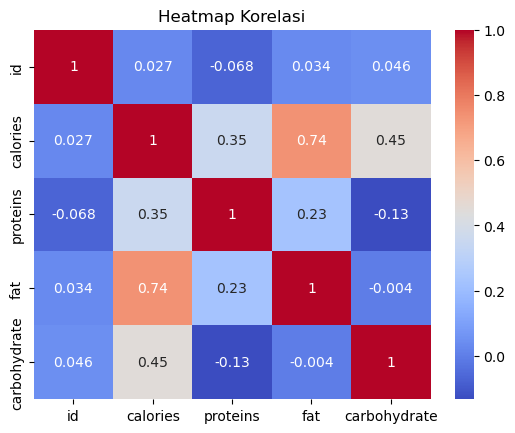

In [29]:
plt.figure()
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()


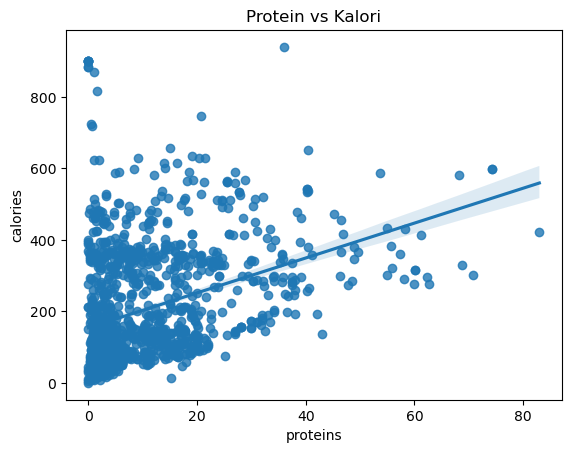

In [33]:
plt.figure()
sns.regplot(x="proteins", y="calories", data=data)
plt.title("Protein vs Kalori")
plt.show()

In [ ]:
data["protein_density"] = (data["proteins"] / data["calories"]) * 100
filtered_data = data.dropna(subset=["protein_density"])
def density(val):
    if val >= 5:
        return "Tinggi Protein"
    elif val >= 2:
        return "Normal"
    else:
        return "Rendah Protein"
data["protein_label"] = data["protein_density"].apply(density)
print(filtered_data[["proteins", "calories", "protein_density", "protein_label"]])

      proteins  calories  protein_density protein_label
0          9.2     280.0         3.285714        Sedang
1         23.7     513.0         4.619883        Sedang
3          1.1      45.0         2.444444        Sedang
4          4.4      37.0        11.891892        Tinggi
5          0.9      85.0         1.058824        Rendah
...        ...       ...              ...           ...
1341       1.2      42.0         2.857143        Sedang
1342       1.0      37.0         2.702703        Sedang
1343       0.7      28.0         2.500000        Sedang
1344       3.0     254.0         1.181102        Rendah
1345       3.3      52.0         6.346154        Tinggi

[1345 rows x 4 columns]
